In [1]:
import pandas as pd
import numpy as np

# Load the datasets
marketing_spend = pd.read_csv('../data/marketing_spend.csv', parse_dates=['Date'])
sales = pd.read_csv('../data/sales.csv', parse_dates=['Date'])
brand_metrics = pd.read_csv('../data/brand_metrics.csv', parse_dates=['Date'])
competitor_activity = pd.read_csv('../data/competitor_activity.csv', parse_dates=['Date'])
macroeconomic_indicators = pd.read_csv('../data/macroeconomic_indicators.csv', parse_dates=['Date'])

# Pivot marketing spend data to have channels as columns
marketing_spend_pivot = marketing_spend.pivot_table(index='Date', columns='Channel', values='Spend').reset_index()

# Merge the datasets into a single dataframe
df = pd.merge(sales, marketing_spend_pivot, on='Date', how='left')
df = pd.merge(df, brand_metrics, on='Date', how='left')
df = pd.merge(df, competitor_activity, on='Date', how='left')
df = pd.merge(df, macroeconomic_indicators, on='Date', how='left')

# Handle missing values (e.g., forward fill for brand and macro data)
# Using ffill() as the fillna(method='ffill') is deprecated
df[['Awareness', 'Consideration']] = df[['Awareness', 'Consideration']].ffill()
df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']] = df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']].ffill()

# Fill remaining NaNs with 0 (for spend)
df.fillna(0, inplace=True)

# Save the prepared data
df.to_csv('../data/prepared_data.csv', index=False)

print("Data preparation complete. The file 'prepared_data.csv' has been created in the 'data' directory.")

Data preparation complete. The file 'prepared_data.csv' has been created in the 'data' directory.


# Phase 2: Data Preparation & Pre-Modeling Analysis

## 1. Data Cleaning & Transformation

In [ ]:
# Pivot marketing spend data to have channels as columns
marketing_spend_pivot = marketing_spend.pivot_table(index='Date', columns='Channel', values='Spend').reset_index()

# Merge the datasets into a single dataframe
df = pd.merge(sales, marketing_spend_pivot, on='Date', how='left')
df = pd.merge(df, brand_metrics, on='Date', how='left')
df = pd.merge(df, competitor_activity, on='Date', how='left')
df = pd.merge(df, macroeconomic_indicators, on='Date', how='left')

# Handle missing values (e.g., forward fill for brand and macro data)
# Using ffill() as the fillna(method='ffill') is deprecated
df[['Awareness', 'Consideration']] = df[['Awareness', 'Consideration']].ffill()
df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']] = df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']].ffill()

# Fill remaining NaNs with 0 (for spend)
df.fillna(0, inplace=True)

print(df.head())
print(df.info())

        Date  revenue  lead_quantity  Content Marketing  Events    Google Ads  \
0 2022-01-02   958411           2809        7359.955502     0.0  19566.261336   
1 2022-01-09  1165252           3771        5776.165152     0.0  16343.026089   
2 2022-01-16  1219726           4023        5885.150788     0.0  15207.259926   
3 2022-01-23  1181442           4363        6524.144512     0.0  20923.916652   
4 2022-01-30  1230077           4233        5021.670357     0.0  19909.632515   

       LinkedIn  Awareness  Consideration  Competitor_A_Spend  \
0  19044.863269   0.552323       0.320353        33493.129350   
1  19690.752821   0.570132       0.323810        22657.427831   
2  16498.454036   0.563315       0.320619        34384.899183   
3  14548.476011   0.579703       0.327826        30911.761244   
4  10935.249333   0.567096       0.341228        27137.788579   

   Competitor_B_Spend  GDP_Growth  Unemployment_Rate  Consumer_Confidence  
0        34214.269231    0.020586           0.

C:\Users\cyber\AppData\Local\Temp\ipykernel_26316\1708715462.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Awareness', 'Consideration']] = df[['Awareness', 'Consideration']].fillna(method='ffill')
C:\Users\cyber\AppData\Local\Temp\ipykernel_26316\1708715462.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']] = df[['GDP_Growth', 'Unemployment_Rate', 'Consumer_Confidence']].fillna(method='ffill')


## 2. Exploratory Data Analysis (EDA)

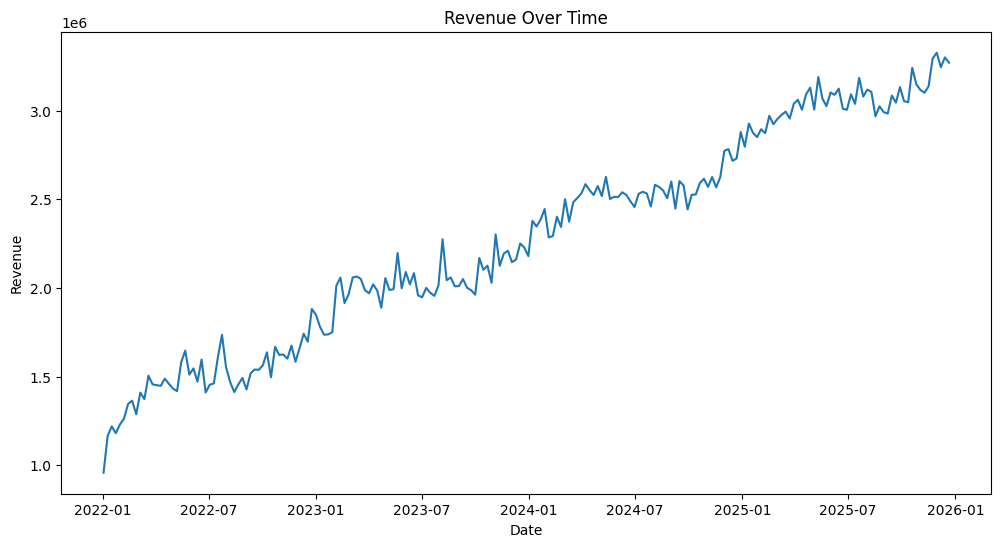

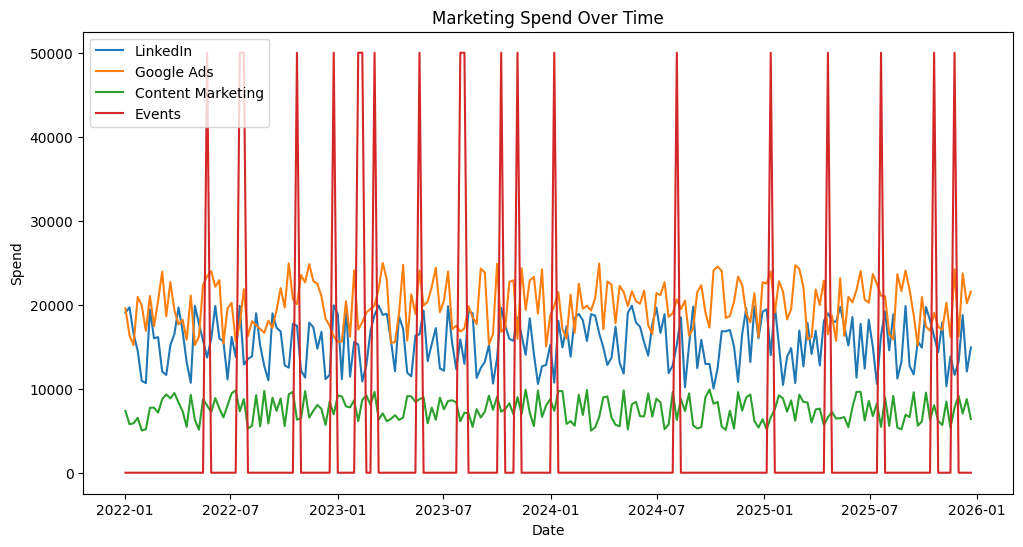

In [4]:
import matplotlib.pyplot as plt

# Plot revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Plot marketing spend over time
plt.figure(figsize=(12, 6))
for channel in ['LinkedIn', 'Google Ads', 'Content Marketing', 'Events']:
    plt.plot(df['Date'], df[channel], label=channel)
plt.title('Marketing Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.legend()
plt.show()

## 3. Rigorous Statistical Filtering

In [5]:
# Multicollinearity Check (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = df[["LinkedIn", "Google Ads", "Content Marketing", "Events", "Competitor_A_Spend", "Competitor_B_Spend"]]
print(calculate_vif(X))

# Stationarity Test (ADF)
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

print("ADF Test for Revenue:")
adf_test(df['revenue'])

            variables        VIF
0            LinkedIn  23.393475
1          Google Ads  42.031202
2   Content Marketing  23.578007
3              Events   1.116223
4  Competitor_A_Spend  23.911370
5  Competitor_B_Spend  36.598378
ADF Test for Revenue:
ADF Statistic: -0.772983
p-value: 0.826930
